## What is Linear Regression?
Simple Linear Regression is finding the best relationship between the input variable x (independent variable) and the expected variable y (dependent variable). The linear relationship between these two variables can be represented by a straight line called regression line.

Formula :- $y = b0 + b1x$

What do terms represent?
- $y$ is the response or the target variable
- $x$ is the feature
- $b1$ is the coefficient of x
- $b0$ is the intercept

#### Estimating ("Learning") Model Coefficients

The coefficients are estimated using the **least-squares criterion**,  i.e.,
the best fit line has to be calculated that minimizes the **sum of squared residuals** (or "sum of squared errors").

## Diving into the code

## Dividing the code into steps for better understanding:
1. Load the dataset.
2. Visualize the data.
3. Training Simple Linear Regression Model.

## Step1 : Load Dataset

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
dataset = pd.read_csv('data/Salary_Data.csv')

In [200]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [201]:
dataset.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [202]:
dataset.shape

(30, 2)

Here, 'YearsExperience' is the independent variable and 'Salary' is the dependent variable which will be predicted based on the value of 'YearsExperience'.

#### Split the dataset into x and y

In [203]:
X = dataset.drop(['Salary'],axis=True)
y = dataset['Salary']

#### Train and Test the data

In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [205]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20, 1), (10, 1), (20,), (10,))

In [206]:
X_train.head()

,YearsExperience
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0


## Step 2: Visualize the data.

### Visualize Whole Data set


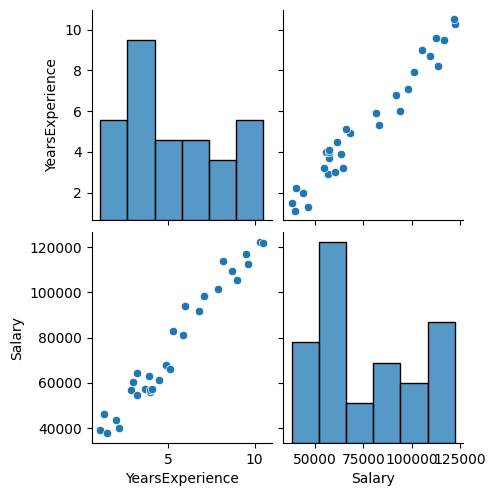

In [207]:
sns.pairplot(dataset)

### Visualize Only Train data

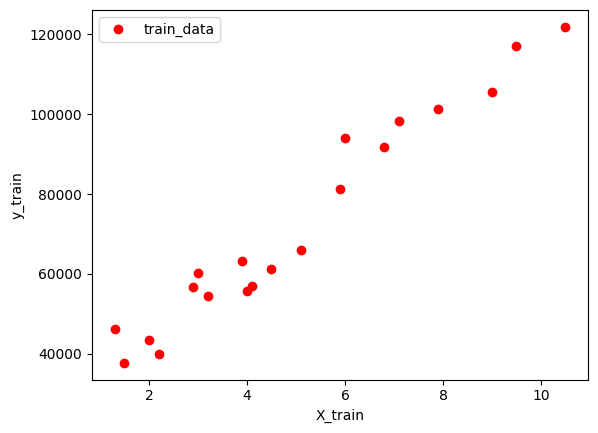

In [208]:
plt.plot(X_train,y_train,'ro',label='train_data')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

### Visualize Only Test data

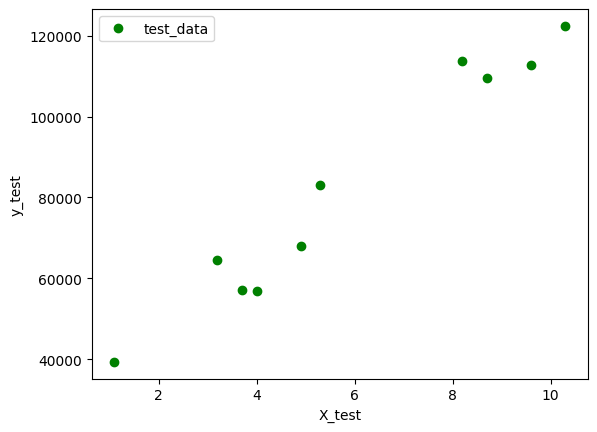

In [209]:
plt.plot(X_test,y_test,'go',label='test_data')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

In The Above three graph clealr shows that the data is linearly deparable so here we use Linear Regression

#### Ok, now we hope the dataset is pretty clear by now. We will move to the next step now!

## Step 3 :Training Simple Linear Regression Model.

In [210]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the Test set results

In [211]:
X_test.head()

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2


In [212]:
y_pred = regressor.predict(X_test).round(1)

In [213]:
y_pred

array([115814.3,  71511.9, 102617.9,  75282.3,  55487.7,  60200.7,
       122412.5, 107330.9,  63028.5,  35693. ])

In [214]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ["Original Salary","Predict Salary"])
calculation

,Original Salary,Predict Salary
0,112635.0,115814.3
1,67938.0,71511.9
2,113812.0,102617.9
3,83088.0,75282.3
4,64445.0,55487.7
5,57189.0,60200.7
6,122391.0,122412.5
7,109431.0,107330.9
8,56957.0,63028.5
9,39343.0,35693.0


In [215]:
print("Training Accuracy :", regressor.score(X_train, y_train))
print("Testing Accuracy :", regressor.score(X_test, y_test))

Training Accuracy : 0.9549236946181227
Testing Accuracy : 0.9553063138044949


## Visualising the Training set results

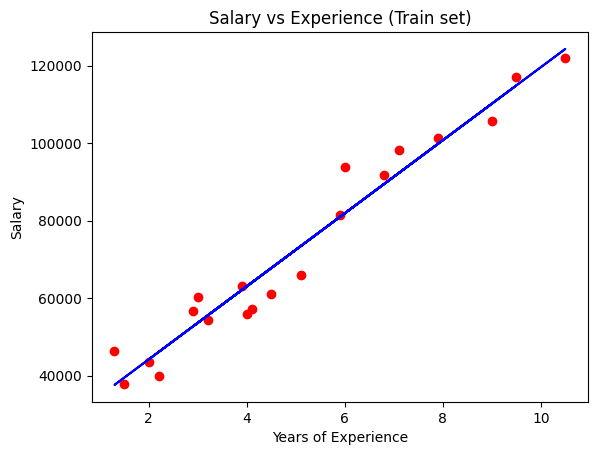

In [216]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Train set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Testing set results

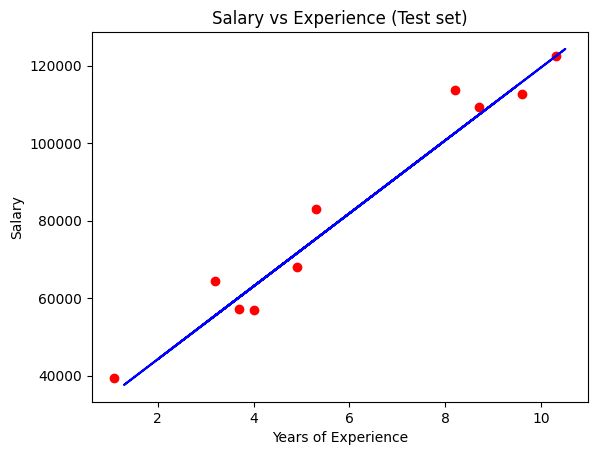

In [217]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()